**선형회귀 모델에서 오류를 측정하는 방법 4가지에 대해서 알아볼 것입니다.**

<br>

- Mean Absolute Error
- Mean Absolute Percentage Error
- Mean Square Error
- Mean Percentage Error

데이터는 캐글 데이터를 활용했습니다.

https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings/data

In [1]:
import pandas as pd
df = pd.read_csv('.//Video_Games_Sales_as_at_22_Dec_2016.csv').dropna().reset_index()
df.tail()

,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
6820,16667,E.T. The Extra-Terrestrial,GBA,2001.0,Action,NewKidCo,0.01,0.00,0.0,0.0,0.01,46.0,4.0,2.4,21.0,Fluid Studios,E
6821,16677,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,Midway Games,0.01,0.00,0.0,0.0,0.01,81.0,12.0,8.8,9.0,Criterion Games,M
6822,16696,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,0.00,0.01,0.0,0.0,0.01,80.0,20.0,7.6,412.0,Kojima Productions,M
6823,16700,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.0,0.0,0.01,61.0,12.0,5.8,43.0,Atomic Games,T
6824,16706,STORM: Frontline Nation,PC,2011.0,Strategy,Unknown,0.00,0.01,0.0,0.0,0.01,60.0,12.0,7.2,13.0,SimBin,E10+


In [2]:
#전체의 데이터중에 Critic_Score, User_Score, Global_Sales열만 사용하도록 하겠습니다.
X = df[['Critic_Score','User_Score']].astype('float32')

sales = df['Global_Sales'].astype('float32')


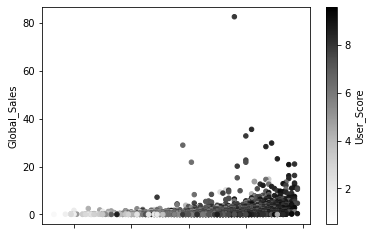

In [4]:
#시각화
import matplotlib.pyplot as plt
%matplotlib inline

df[['Critic_Score','User_Score',
    'Global_Sales']].astype('float').plot.scatter(x='Critic_Score',
                                                  y='Global_Sales',
                                                  c='User_Score')
                    

x축은 평론가 점수이고 y축은 비디오 게임의 판매량입니다. 그리고 유저들의 평가는 색상으로 표현했습니다. 

점수가 높을 수록 판매량이 높은 분명한 선형 관계가 보입니다.

그리고 몇개의 특이값(outliners) 보입니다.

In [5]:
#선형회귀모델 만들었습니다.
from sklearn.linear_model import LinearRegression
lm = LinearRegression(n_jobs=-1)
lm.fit(X, sales)
y_true = sales.values
y_pred = lm.predict(X)

생성한 선형회귀 모델을 평가하는 지표를 차례대로 살펴보면서 각각의 지표에 대한 특성을 이해하고 상황에 맞게 잘 사용을 하시길 기원합니다.

In [6]:
#MAE
import numpy as np

def MAE(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred)))

MAE(y_true, y_pred)

0.76997954

In [7]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_true, y_pred)

0.76997954

우리 모델의 MAE는 0.760이며, 우리의 데이터 판매 범위는 0.01에서 83이기 때문에 상당히 괜찮은 값입니다.

In [8]:
def MSE(y_true, y_pred):
    return np.mean(np.square((y_true - y_pred)))

MSE(y_true, y_pred)

3.6227748

In [9]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_true, y_pred)

3.6227748

In [10]:
np.sqrt(MSE(y_true, y_pred))

1.9033588

In [11]:
def MAPE(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE(y_true, y_pred)

558.8788509368896

In [12]:
def MPE(y_true, y_pred): 
    return np.mean((y_true - y_pred) / y_true) * 100
MPE(y_true, y_pred)

-468.23267936706543

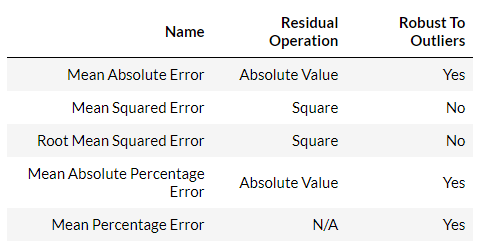

수 많은 지표가 있고 데이터 상황에 따라서 다르게 써야한다는 사실을 얻으셨길 바랍니다.

추가적으로, 사이킷런 공식문서에 다양한 회귀지표가 있다는 것을 알면 좋을 것 같아서 공유합니다.

https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics